## Look before you leap! "Graphs are essential to good statistical analysis"

We see many notebooks on kaggle that treat the theme of [exploratory data analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) and that is for a very good reason. Here is a classic example, known as *'Anscombe's quartet'*, as to just why the use of graphical techniques to inspect the data before proceeding with any further action, such as [feature selection](https://en.wikipedia.org/wiki/Feature_selection) etc. is so crucial.
This notebook reproduces the four [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) as well as the regression analysis of the data provided in the famous paper by the statistician [Frank J. Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) titled ["Graphs in Statistical Analysis"](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966) which was published in 1973.

First we shall perform an [ordinary least squares regression](https://en.wikipedia.org/wiki/Simple_linear_regression) on the aforementioned [four sets of data points](https://www.kaggle.com/carlmcbrideellis/data-anscombes-quartet). The model that we use is that of a straight line; $ y = mx + c $, where $m$ represents the slope and $c$ is the intercept on the $y$-axis.

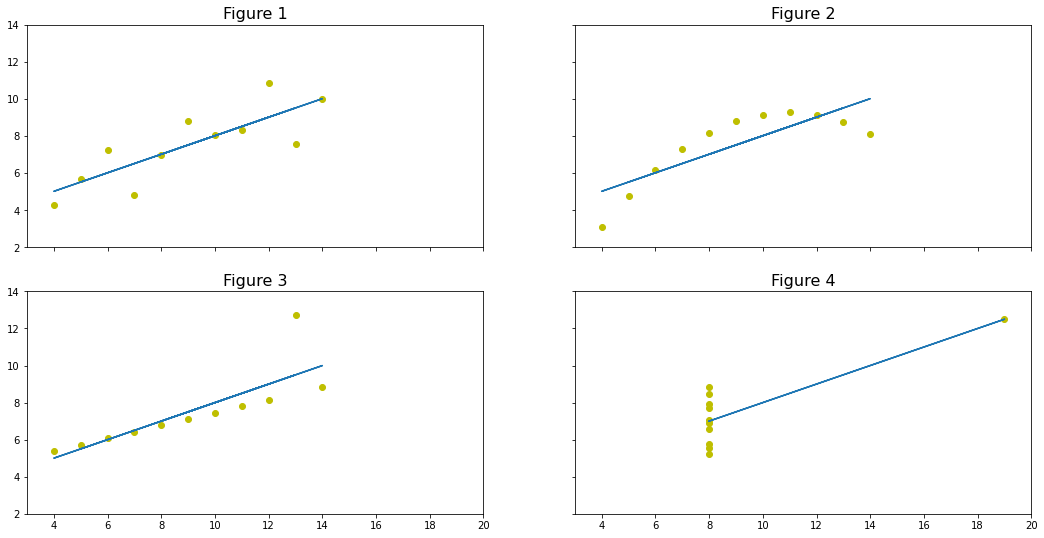

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

# read in the csv file containing the data
quartet_data = pd.read_csv('../input/data-anscombes-quartet/Anscombe_quartet_data.csv')

# Figure 1 fit:
x1 = quartet_data['x123']
y1 = quartet_data['y1']
m1,c1 = np.polyfit(x1, y1, 1)
# Figure 2 fit:
x2 = quartet_data['x123']
y2 = quartet_data['y2']
m2,c2 = np.polyfit(x2, y2, 1)
# Figure 3 fit:
x3 = quartet_data['x123']
y3 = quartet_data['y3']
m3,c3 = np.polyfit(x3, y3, 1)
# Figure 4 fit:
x4 = quartet_data['x4']
y4 = quartet_data['y4']
m4,c4 = np.polyfit(x4, y4, 1)
# plot all four plots in a multiplot:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(18,9))
plt.xlim(3,20)
plt.ylim(2,14)
axs[0, 0].set_title('Figure 1', fontsize=16)
axs[0, 0].plot(x1, y1, 'yo', x1, m1*x1+c1) 
axs[0, 1].set_title('Figure 2', fontsize=16)
axs[0, 1].plot(x2, y2, 'yo', x2, m2*x2+c2)
axs[1, 0].set_title('Figure 3', fontsize=16)
axs[1, 0].plot(x3, y3, 'yo', x3, m3*x3+c3) 
axs[1, 1].set_title('Figure 4', fontsize=16)
axs[1, 1].plot(x4, y4, 'yo', x4, m4*x4+c4);

We can see that:

* In Figure 1 the points almost lie along a straight line, and that our straight line model seems to be a reasonable choice.
* In Figure 2 the points would really be better fitted by a smooth curve, such as a quadratic model (i.e. $y = ax^2 + mx +c$).
* In Figure 3 we see an outlier point, whose removal from the data set would result in a much better fit.
* In Figure 4 we see that outcome variables are completely independent of the explanatory variable, and a regression is only possible because of one single point, in this case it is a 'high-leverage' point, i.e. this point is exerting a large (or in this case total) influence on the slope of the fit.

However, we can see form the Table below that all the simple 'descriptive' statistical properties, for each of the four plots, are **almost exactly the same** (Note that I have deliberately printed all of the available significant figures to show just how well this example data set was designed).

In [2]:
# mean values (x-bar)
x1_mean = quartet_data['x123'].mean()
x4_mean = quartet_data['x4'].mean()
# y-bar
y1_mean = quartet_data['y1'].mean()
y2_mean = quartet_data['y2'].mean()
y3_mean = quartet_data['y3'].mean()
y4_mean = quartet_data['y4'].mean()

# Sum of squares of x - mean(x)
sum_of_squares_123 = ((quartet_data['x123']-x1_mean)**2).sum()
sum_of_squares_4 = ((quartet_data['x4']-x1_mean)**2).sum()

# Regression sum of squares
RSS_y1 = (( (m1*quartet_data['x123']+c1) - y1_mean)**2).sum()
RSS_y2 = (( (m2*quartet_data['x123']+c2) - y2_mean)**2).sum()
RSS_y3 = (( (m3*quartet_data['x123']+c3) - y3_mean)**2).sum()
RSS_y4 = (( (m4*quartet_data['x4']+c4)   - y4_mean)**2).sum()

# Residual sum of squares (sum of squares error)
RSSY_y1 = (( quartet_data['y1'] - (m1*quartet_data['x123']+c1) )**2).sum()
RSSY_y2 = (( quartet_data['y2'] - (m1*quartet_data['x123']+c1) )**2).sum()
RSSY_y3 = (( quartet_data['y3'] - (m1*quartet_data['x123']+c1) )**2).sum()
RSSY_y4 = (( quartet_data['y4'] - (m1*quartet_data['x4']+c1)   )**2).sum()

# Total sum of squares 
TSS_1 = (( quartet_data['y1'] - y1_mean )**2).sum()
TSS_2 = (( quartet_data['y2'] - y2_mean )**2).sum()
TSS_3 = (( quartet_data['y3'] - y3_mean )**2).sum()
TSS_4 = (( quartet_data['y4'] - y4_mean )**2).sum()

# standard error of the slope
n = 11 # n is the number of 'observations'
SES_1 = np.sqrt(RSSY_y1/(n-2))/np.sqrt(sum_of_squares_123)
SES_2 = np.sqrt(RSSY_y2/(n-2))/np.sqrt(sum_of_squares_123)
SES_3 = np.sqrt(RSSY_y3/(n-2))/np.sqrt(sum_of_squares_123)
SES_4 = np.sqrt(RSSY_y4/(n-2))/np.sqrt(sum_of_squares_4)

# R squared (aka. coefficient of determination)
R2_1  = 1 - (RSSY_y1 / TSS_1)
R2_2  = 1 - (RSSY_y2 / TSS_2)
R2_3  = 1 - (RSSY_y3 / TSS_3)
R2_4  = 1 - (RSSY_y4 / TSS_4)

In [3]:
# create a table 
data_matrix = [['Parameter',                   'Data set 1', 'Data set 2', 'Data set 3', 'Data set 4'],
               ['$\\bar{x}$ ',                  x1_mean,      x1_mean,      x1_mean, x4_mean],
               ['$\\bar{y}$ ',                  y1_mean,      y2_mean,      y3_mean, y4_mean],
               ['Slope',                        m1,           m2,           m3,      m4],
               ['Intercept  ',                  c1,           c2,           c3,      c4],
               ['$\mathsf{Sum~of~squares~of~}x-\\bar{x}$',sum_of_squares_123,sum_of_squares_123,sum_of_squares_123,sum_of_squares_4 ],
               ['Regression sum of squares',    RSS_y1,       RSS_y2,       RSS_y3,  RSS_y4],
               ['Residual sum of squares of y', RSSY_y1,      RSSY_y2,      RSSY_y3, RSSY_y4],
               ['Standard error of the slope',  SES_1,        SES_2,        SES_3,   SES_4],
               ['$R^2$',                        R2_1,         R2_2,         R2_3,    R2_4 ]]
fig = ff.create_table(data_matrix)
fig.show()

Thus, despite the four scatter plots being completely different in nature,  from the standpoint of numerical analysis alone and with no visualisation one would could be led to think one was looking at pretty much same data each and every time. 

The moral of the story is ***look before you leap!***

### Further reading

* John W. Tukey "Exploratory Data Analysis", Pearson (1977)
* [Wes McKinney "Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython", O'Reilly Media (2017)](http://shop.oreilly.com/product/0636920050896.do) + [(GitHub)](https://github.com/wesm/pydata-book)
* [Jake VanderPlas "Python Data Science Handbook: Essential Tools for Working with Data",O'Reilly Media (2016)](http://shop.oreilly.com/product/0636920034919.do) + [(website)](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [Suresh Kumar Mukhiya and Usman Ahmed "Hands-On Exploratory Data Analysis with Python", Packt (2020)](https://www.packtpub.com/data/hands-on-exploratory-data-analysis-with-python)
* [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)
* [Justin Matejka and George Fitzmaurice "Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing" ACM SIGCHI Conference on Human Factors in Computing Systems (2017)](https://www.autodeskresearch.com/sites/default/files/SameStats-DifferentGraphs.pdf)

### References

* Francis J. Anscombe "*Graphs in Statistical Analysis*", The American Statistician **27** pp. 17-21 (1973) ([doi: 10.1080/00031305.1973.10478966](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966))